<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Máquinas de Vector Soporte (SVM)</h1>
</div>


Generalmente, `Support Vector Machines` se considera un algoritmo de aprendizaje supervizado para clasificación, pero puede emplearse en ambos tipos de problemas de clasificación y regresión. 

>Puede manejar fácilmente múltiples variables continuas y categóricas.

>SVM construye un hiperplano en un espacio multidimensional para separar diferentes clases.

>SVM genera un hiperplano óptimo de manera iterativa, que se utiliza para minimizar un error. La idea central de SVM es encontrar un hiperplano marginal máximo (MMH) que divida mejor el conjunto de datos en clases.

> **Vectores Soportes:** Los vectores de soporte son los puntos de datos más cercanos al hiperplano. Estos puntos definirán mejor la línea de separación calculando los márgenes. Estos puntos son más relevantes para la construcción del clasificador.

> **Hiperplano:** Un hiperplano es un plano de decisión que separa un conjunto de objetos que tienen diferentes membresías de clase.

>**Margen:** Un margen es un espacio que existe entre dos líneas obtenidas en función de los puntos de cada clase. Esto se calcula como la distancia perpendicular desde la línea hasta los vectores soporte o los puntos más cercanos. Si el margen es mayor entre las clases, entonces se considera un buen margen, un margen más pequeño es un mal margen.


### Algoritmo
El objetivo principal es segregar el conjunto de datos dado de la mejor manera posible. La distancia entre los puntos más cercanos se conoce como margen. El objetivo es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte en el conjunto de datos dado. SVM busca el hiperplano marginal máximo.


1. Basada en kernels que realiza clasificación lineal sobre vectores transformados a un espacio de dimensión superior, es decir, separa mediante un hiperplano en el espacio transformado.

2. Encuentra el hiperplano que maximiza el “margen” entre dos clases


Un hiperplano en un espacio n-dimensional se define como:

$$ \mathbf{w}^T \mathbf{x} + b = 0 $$

Donde:
- $\mathbf{w}$: vector de pesos
- $\mathbf{x}$: vector de características
- $b$: sesgo (bias)

SVM busca maximizar la distancia (margen) entre el hiperplano y los puntos más cercanos de cada clase.

La optimización se expresa como:

$$ \min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2 $$

Sujeto a:

$$ y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 $$

Donde $y_i$ es la etiqueta de clase (+1 o -1).


**Visualmente**
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png' width='600' style='border-radius:8px;'/>

En la imagen, el hiperplano separa dos clases y los vectores de soporte son los puntos más cercanos al margen.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std=0.6)

(-1.0, 3.5)

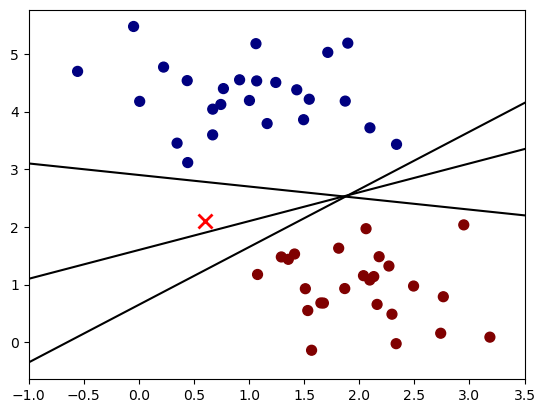

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

plt.plot([0.6],[2.1], 'x',color='red',
        markeredgewidth=2,markersize=10)

for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit + b, '-k')

plt.xlim(-1,3.5)

La intuicion de SVM es que podemos dibujar una recta para clasificar las clases y dibijuar un margén de cierta distancia entre las rectas:

(-1.0, 3.5)

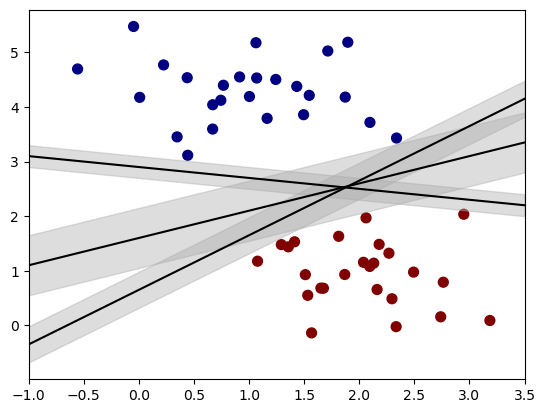

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')


for m, b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit - d, yfit +d, 
                     edgecolor='none',
                    color = '#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5)

La linea que maximiza ese margen es la que se escoge como el modelo óptimo. 

### Ejemplo 1: Datos Linealmente separables

In [5]:
X, y

(array([[ 1.41281595,  1.5303347 ],
        [ 1.81336135,  1.6311307 ],
        [ 1.43289271,  4.37679234],
        [ 1.87271752,  4.18069237],
        [ 2.09517785,  1.0791468 ],
        [ 2.73890793,  0.15676817],
        [ 3.18515794,  0.08900822],
        [ 2.06156753,  1.96918596],
        [ 2.03835818,  1.15466278],
        [-0.04749204,  5.47425256],
        [ 1.71444449,  5.02521524],
        [ 0.22459286,  4.77028154],
        [ 1.06923853,  4.53068484],
        [ 1.53278923,  0.55035386],
        [ 1.4949318 ,  3.85848832],
        [ 1.1641107 ,  3.79132988],
        [ 0.74387399,  4.12240568],
        [ 2.29667251,  0.48677761],
        [ 0.44359863,  3.11530945],
        [ 0.91433877,  4.55014643],
        [ 1.67467427,  0.68001896],
        [ 2.26908736,  1.32160756],
        [ 1.5108885 ,  0.9288309 ],
        [ 1.65179125,  0.68193176],
        [ 2.49272186,  0.97505341],
        [ 2.33812285,  3.43116792],
        [ 0.67047877,  4.04094275],
        [-0.55552381,  4.695

### Definición de la clase SVM

In [6]:
#Agregar a su librería
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.where(np.array(y) == 0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        X = np.array(X)
        approx = np.dot(X, self.w) + self.b
        return np.where(approx >= 0, 1, 0)


In [7]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [8]:
from HyAIA import HyAIA as hy

In [9]:
X_train_df, X_test_df, y_train_df, y_test_df = hy.train_test_split(pd.DataFrame(X), 
                                                                   pd.DataFrame(y), test_size=0.2)


In [10]:
y_test_df.values

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [11]:
svm = SVM(lr=0.00001, lambda_param=0.001, n_iters=5000)
svm.fit(X_train_df.values, y_train_df.values.flatten())

In [12]:
y_pred = svm.predict(X_train_df.values)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [13]:
def accuracy(ytrue, y_pred):
    accuracy = np.sum(ytrue==y_pred)/len(ytrue)
    return accuracy

In [14]:
accuracy(y_pred,  y_train_df.values.flatten())

0.975

### Modelo con librería sklearn

In [15]:
from sklearn import svm
from sklearn.metrics import(accuracy_score, 
                            precision_score,
                            recall_score)


In [16]:
#Crear el modelo con SVM
modelo_svm = svm.SVC(kernel='linear')
#Entrenar al modelo
modelo_svm.fit(X_train_df.values, y_train_df.values.flatten())
# Predecir (evaluar al modelo)
y_pred = modelo_svm.predict(X_train_df)

In [17]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [18]:
y_train_df.values.flatten()

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [19]:
accuracy_score(y_pred, y_train_df.values.flatten())

1.0

In [20]:
#Predicción para el testeo
y_pred_test = modelo_svm.predict(X_test_df)

In [21]:
y_pred_test

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [22]:
accuracy_score(y_pred_test, y_test_df.values.flatten())

1.0

In [23]:
modelo_svm.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [24]:
# Dibujar el hiperplano de separación
beta = modelo_svm.coef_[0]
m = -beta[0]/beta[1]

xx = np.linspace(-1,4)
yy = m*xx - (modelo_svm.intercept_[0]/beta[1])

vs = modelo_svm.support_vectors_

#%% Margenes de separación
b = vs[0]
yy_down = m*xx + (b[1] - m*b[0])

b = vs[-1]
yy_up = m*xx + (b[1] - m*b[0])


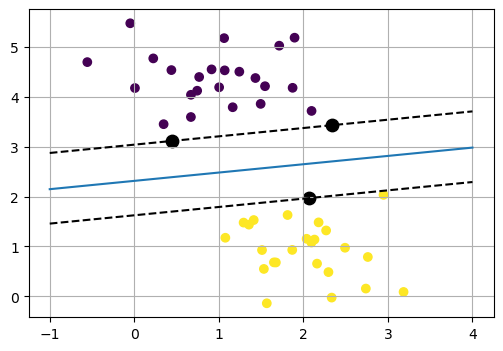

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx,yy_up,'k--')
plt.plot(xx,yy_down,'k--')
plt.scatter(vs[:,0], vs[:,1], s=80, facecolor='k')
plt.plot(xx,yy)
plt.grid()

plt.show()


### Tratar con datos que no son linealmente separables

In [26]:
# importar los datos 
data = pd.read_csv('Data/ex2data2.txt', header=None)
data.head()


,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [27]:
X_df = data.iloc[:,:-1]
y_df = data.iloc[:,-1]
X_train_df, X_test_df, y_train_df, y_test_df = hy.train_test_split(pd.DataFrame(X_df), 
                                                                   pd.DataFrame(y_df), test_size=0.2)



In [28]:
X_df.shape

(118, 2)

In [29]:
X_train_df.shape, y_train_df.shape

((94, 2), (94, 1))

In [30]:
X_test_df.shape,y_test_df.shape

((24, 2), (24, 1))

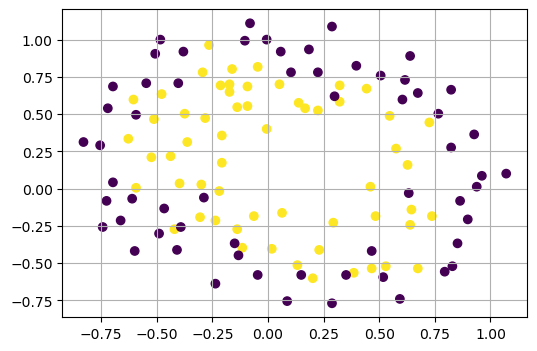

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = data.iloc[:,2])
plt.grid()
plt.show()

Algunos problemas no se pueden resolver utilizando un hiperplano lineal.

>En tal situación, **SVM** usa un truco del kernel para transformar el espacio de entrada en un espacio dimensional más grande. 

**SVM Kernels**

El algoritmo SVM se implementa en la práctica utilizando un kernel. 

>Un **kernel** transforma un espacio de datos de entrada en la forma requerida. Aquí, el kernel toma un espacio de entrada de menor dimensión y lo transforma en un espacio de mayor dimensión. En otras palabras, se puede decir que se convierte un problema no linealmente separable en problemas separables al agregarle una mayor dimensión. 


<img alt="Datos categóricos con Python" title="Datos categóricos con Python" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJKujfCumij1R0vDYuPFSbys3-Du7hrrIwTBHO4J06Ivi6MkFIJa7NQnE1rITiNoLaUro&usqp=CAU" high=200px width=300px>


**Kernel lineal** Se puede utilizar un kernel lineal como producto escalar normal cualesquiera dos observaciones dadas. El producto entre dos vectores es la suma de la multiplicación de cada par de valores de entrada.

$$K(x,x_i) = \sum(x*x_i) $$


**Kernel polinomial** Un kernel polinomial es una forma más generalizada del kernel lineal. El kernel polinomial puede distinguir el espacio de entrada curvo o no lineal.

$$K(x,x_i) = 1 \sum(x*x_i)^d $$

Donde $d$ es el grado del polinomio. $d = 1$ es similar a la transformación lineal. 

**Kernel de función de base radial (RBF)** RBF puede mapear un espacio de entrada en un espacio dimensional infinito.

$$K(x,x_i) = exp(-\gamma * \sum(x – x_i^2))$$

In [32]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [33]:
#%% Crear y entrenar el modelo SVM
modelo = svm.SVC(kernel='rbf')
modelo.fit(X_train_df.values,y_train_df.values.flatten())

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
y_pred = modelo.predict(X_train_df.values)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [35]:
y_train_df.values.flatten()

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0], dtype=int64)

In [36]:
accuracy_score(y_train_df.values.flatten(), y_pred)

0.8404255319148937

In [37]:
#Modelo polinomial
modelo = svm.SVC(kernel='poly')
modelo.fit(X_train_df.values,y_train_df.values.flatten())
y_pred_poly = modelo.predict(X_train_df.values)
y_pred_poly


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
accuracy_score(y_train_df.values.flatten(), y_pred_poly)

0.6382978723404256

In [39]:
#Modelo polinomial
modelo = svm.SVC(kernel='poly', degree=8)
modelo.fit(X_train_df.values,y_train_df.values.flatten())
y_pred_poly = modelo.predict(X_train_df.values)
y_pred_poly


array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
accuracy_score(y_train_df.values.flatten(), y_pred_poly)


0.7659574468085106

In [41]:
#Modelo kernel lineal
modelo = svm.SVC(kernel='linear')
modelo.fit(X_train_df.values,y_train_df.values.flatten())
y_pred_linear = modelo.predict(X_train_df.values)
y_pred_linear

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [42]:
accuracy_score(y_train_df.values.flatten(), y_pred_linear)

0.574468085106383

### Practica:

Considere el dataset "apples_and_oranges.csv" que se encuentra en la carpeta de Data, realize una clasificación por SVM utilizando los diferentes kernels: linear, poly, rbf. Grafique los datos con su clasificación y los vectores soportes.

In [55]:
df = pd.read_csv('Data/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [56]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [57]:
df['Class_c'] = df['Class'].astype('category').cat.codes

In [58]:
df.head()

,Weight,Size,Class,Class_c
0,69,4.39,orange,1
1,69,4.21,orange,1
2,65,4.09,orange,1
3,72,5.85,apple,0
4,67,4.70,orange,1


In [59]:
X_df = df.iloc[:,[0,1]]
y_df = df.iloc[:,-1]

In [60]:
X_df.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [61]:
y_df.shape

(40,)

In [62]:
X_train_df, X_test_df, y_train_df, y_test_df = hy.train_test_split(pd.DataFrame(X_df), 
                                                                   pd.DataFrame(y_df), test_size=0.2)



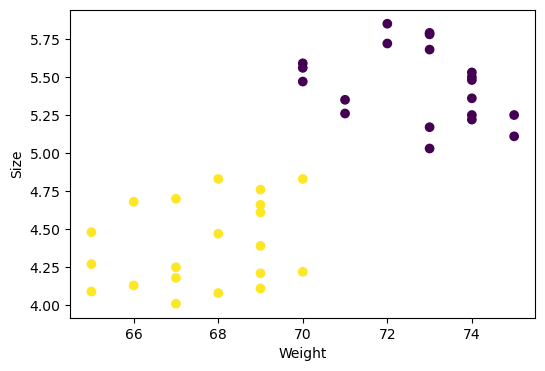

In [63]:
plt.figure(figsize=(6,4))
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c = df.iloc[:,-1].values)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

In [64]:
modelo = svm.SVC(kernel='linear')
modelo.fit(X_train_df.values,y_train_df.values.flatten())
ypred = modelo.predict(X_train_df.values)
ypred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int8)

In [65]:
accuracy_score(ypred, y_train_df.values.flatten())

1.0

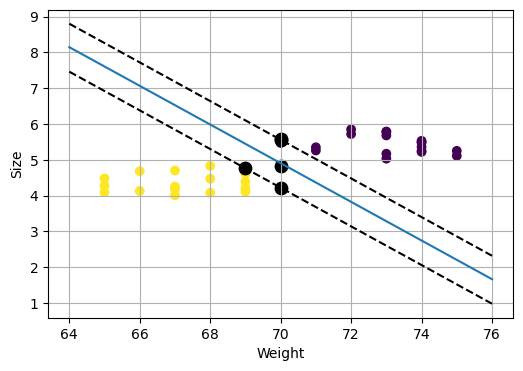

In [66]:
# Dibujar el hiperplano de separación
beta = modelo.coef_[0]
m = -beta[0]/beta[1]

xx = np.linspace(64,76)
yy = m*xx - (modelo.intercept_[0]/beta[1])

vs = modelo.support_vectors_

#%% Margenes de separación
b = vs[0]
yy_down = m*xx + (b[1] - m*b[0])

b = vs[-1]
yy_up = m*xx + (b[1] - m*b[0])


plt.figure(figsize=(6,4))
plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c = df.iloc[:,-1].values)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.plot(xx,yy_up,'k--')
plt.plot(xx,yy_down,'k--')
plt.scatter(vs[:,0], vs[:,1], s=80, facecolor='k')
plt.plot(xx,yy)
plt.grid()
plt.show()
